In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# for getting into my current dir for PONG
cd /


/


In [13]:
cd /content/drive/My\ Drive/'Colab Notebooks'/PONG

/content/drive/My Drive/Colab Notebooks/PONG


In [14]:
pwd

'/content/drive/My Drive/Colab Notebooks/PONG'

In [0]:
import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
import cv2
import time

In [16]:
MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}'.format(MODEL_FIRST,MODEL_END)
MODEL_NAME

'Pong_Thu May  2 05:59:15 2019'

In [0]:
#!wget https://gitlab.com/bkp17/pong_ai/raw/master/cnn_implementation/images.zip

In [0]:
#!sudo apt-get update && apt-get upgrade

In [0]:
#ls

In [0]:
#!sudo unzip images.zip -d /content/drive/My\ Drive/'Colab Notebooks'/PONG

In [0]:
#ls

In [0]:
#!wget https://gitlab.com/bkp17/pong_ai/raw/master/cnn_implementation/actions.csv

In [28]:
X = []
Y = []

with open ('actions.csv', 'r') as f:
    for line in f:
        Y.append(line.rstrip())


all_images = []
img_num = 0
while img_num < 3000: #3000 denotes the total no of input images
        img = cv2.imread('images/frame_{0}.jpg'.format(img_num), cv2.IMREAD_GRAYSCALE)
        img = img[:, :, np.newaxis]
        all_images.append(img)
        img_num += 1

X = np.array(all_images)


# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 3
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=64,
              epochs=90,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training

model.save(MODEL_NAME)


Train on 2400 samples, validate on 600 samples
Epoch 1/90
2400/2400 [==============================] - 2s 846us/step - loss: 1.0984 - acc: 0.3529 - val_loss: 1.0874 - val_acc: 0.4400
Epoch 2/90
2400/2400 [==============================] - 1s 386us/step - loss: 1.0759 - acc: 0.4242 - val_loss: 1.0687 - val_acc: 0.3933
Epoch 3/90
2400/2400 [==============================] - 1s 387us/step - loss: 1.0438 - acc: 0.4663 - val_loss: 1.0239 - val_acc: 0.4850
Epoch 4/90
2400/2400 [==============================] - 1s 389us/step - loss: 1.0168 - acc: 0.5058 - val_loss: 0.9998 - val_acc: 0.5200
Epoch 5/90
2400/2400 [==============================] - 1s 386us/step - loss: 0.9798 - acc: 0.5275 - val_loss: 0.9348 - val_acc: 0.5700
Epoch 6/90
2400/2400 [==============================] - 1s 389us/step - loss: 0.9078 - acc: 0.5958 - val_loss: 0.8348 - val_acc: 0.6683
Epoch 7/90
2400/2400 [==============================] - 1s 383us/step - loss: 0.8161 - acc: 0.6400 - val_loss: 0.7417 - val_acc: 0.6833
E

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


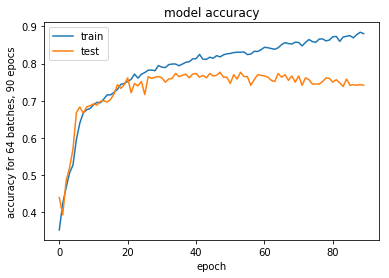

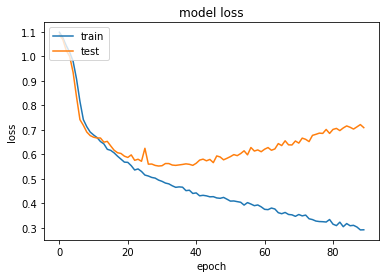

In [30]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# !sudo rm actions.csv.1